In [11]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
import scipy
import scipy.fftpack
import pylab
from scipy import pi
get_ipython().magic(u'matplotlib inline')
%config InlineBackend.figure_format = 'retina'

from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [12]:
exp1 = np.fromfile('D://Figures+data//osc.dat',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('D://Figures+data//pha',dtype=float,count=-1, sep=" ")
exp3 = np.fromfile('D://Figures+data//amp',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('D://Figures+data//qpc.dat',dtype=float,count=-1, sep=" ")
exp5 = np.fromfile('D://Figures+data//fft_r',dtype=float,count=-1, sep=" ")
exp6 = np.fromfile('D://Figures+data//fft_f',dtype=float,count=-1, sep=" ")
#exp61 = np.fromfile('D://fft_r1',dtype=float,count=-1, sep=" ")
#exp62 = np.fromfile('D://fft_r2',dtype=float,count=-1, sep=" ")
#exp63 = np.fromfile('D://fft_r3',dtype=float,count=-1, sep=" ")
exp7 = np.fromfile('D://Figures+data//fit1',dtype=float,count=-1, sep=" ")
exp8 = np.fromfile('D://Figures+data//dddd.dat',dtype=float,count=-1, sep=" ")
cj = np.fromfile('D://fft2.txt',dtype=float,count=-1, sep=",")

In [13]:
exp4 = np.reshape(exp4, (-1, 3))
exp4=np.transpose(exp4)
exp7 = np.reshape(exp7, (-1, 1))
exp7=np.transpose(exp7)
exp8 = np.reshape(exp8, (501, 221))
#exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
exp8=np.transpose(exp8)

In [14]:
exp3.shape

(201,)

In [15]:
exp1 = np.reshape(exp1, (251, 1001))
exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
exp1=np.transpose(exp1)
#exp2 = np.reshape(exp2, (-1, 201))
#exp3 = np.reshape(exp3, (-1,201))
#exp5 = np.reshape(exp5, (-1, 161))
#exp6 = np.reshape(exp6, (-1,161))
#exp61 = np.reshape(exp61, (-1,161))
#exp62 = np.reshape(exp62, (-1,161))
#exp63 = np.reshape(exp63, (-1,161))


(-1.8, -0.8)

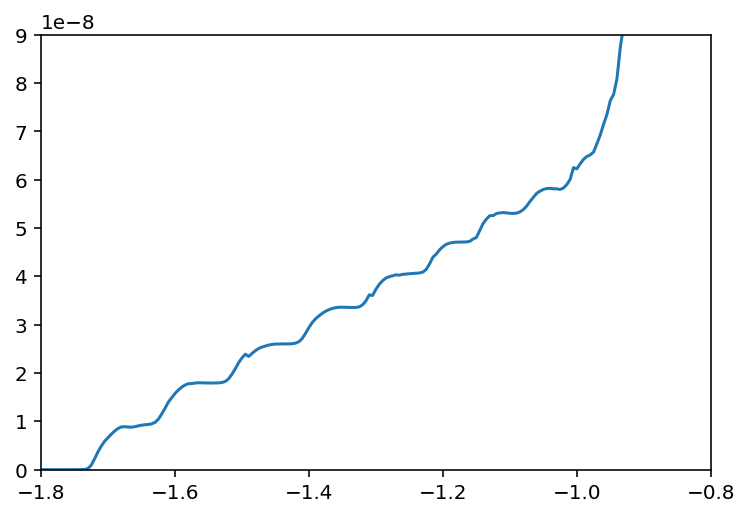

In [16]:
plt.plot(exp4[0],exp4[1])
plt.ylim(0,9E-8)
plt.xlim(-1.8,-0.8)

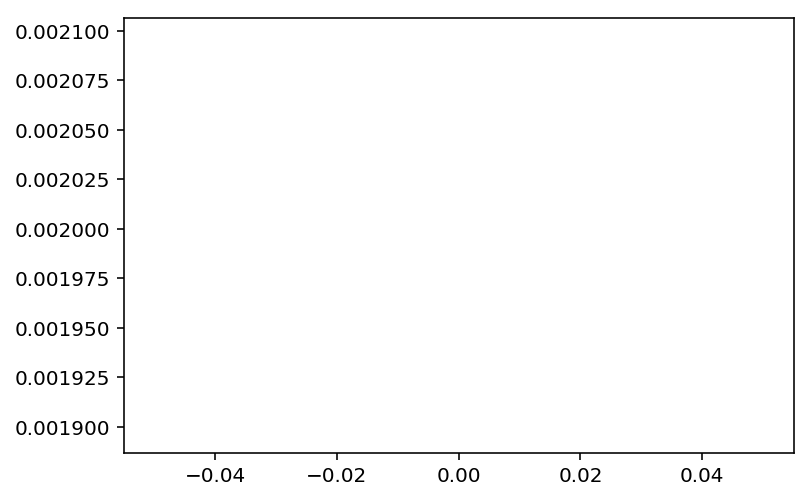

In [17]:
plt.plot(exp3[0])

In [18]:
for i in range(251):
    dat=baseline_als(exp1[i],10000,0.01,100)
    exp1[i]=exp1[i]-dat

In [19]:
new2

NameError: name 'new2' is not defined

In [ ]:
from scipy import ndimage
new2=exp1[50:200,0:400]

In [ ]:
cj

In [ ]:
cj = np.reshape(cj, (2500,750))

In [ ]:
gauss_denoised = ndimage.gaussian_filter(new2, 2)
med_denoised = ndimage.median_filter(new2, 3)
plt.imshow(gauss_denoised)

In [ ]:
plt.plot(gauss_denoised[10],'o')

In [ ]:
plt.imshow(new2, aspect='auto')

In [ ]:
for i in range(251):
    dat=baseline_als(exp1[i],10000,0.01,100)
    exp1[i]=exp1[i]-dat

In [ ]:
exp1.shape
plt.imshow(test[50:200,0:500])
np.savetxt('D:\\quest', test[50:200,0:500], delimiter=' ') 

In [ ]:
test.shape

In [ ]:
import numpy as np
from scipy import interpolate

mymin,mymax = 0,3
X = np.linspace(1,1001,1001)
Y = np.linspace(1,251,251)

x,y = np.meshgrid(X,Y)

plt.imshow(test[50:200,0:500])

a=scipy.ndimage.zoom(test[50:200,0:500],zoom=10,prefilter=True)
gauss_denoised = ndimage.gaussian_filter(a, 100)
med_denoised = ndimage.median_filter(a,100)

In [ ]:
a.shape

In [ ]:
#plt.plot(gauss_denoised[20],'-')
#plt.plot(gauss_denoised[50],'-')
#plt.plot(gauss_denoised[300],'-')

plt.imshow(gauss_denoised)


In [ ]:
laplace= ndimage.filters.gaussian_laplace(a,100)
plt.imshow(laplace)

In [ ]:
from scipy import fftpack
from matplotlib.colors import LogNorm


fft2 = fftpack.fft2(a)
F_mag = np.abs(np.fft.fftshift(fft2))

plt.imshow(F_mag,norm=LogNorm(vmax=1), interpolation='none',aspect='auto')
#plt.ylim(750,1250)
#plt.xlim(750,1250)
#plt.xlim(2000,3000)


In [ ]:
plt.imshow(F_mag,vmax=1E-5, interpolation='none',aspect='auto')
plt.ylim(475,525)
plt.xlim(475,525)

In [ ]:
f

In [ ]:
plt.plot(fft2[40])
plt.xlim(0,100)

In [ ]:
1E9*abs(fft2)

In [ ]:
for i in range(221):
    dat=baseline_als(exp8[i],100,0.01,100)
    exp8[i]=exp8[i]-dat

In [ ]:
#two dimensional FFT example

# following http://matlabgeeks.com/tips-tutorials/how-to-do-a-2-d-fourier-transform-in-matlab/

import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import math

# get the figure
f = gauss_denoised

# two dimension FFT -- F is complex
F = np.fft.fft2(f)

print(f.shape)
print(F.shape)

# find the mag and phase -- shift to put 0 wavenumber at the center
F_mag = np.abs(np.fft.fftshift(F))
F_phase = np.angle(np.fft.fftshift(F))


plt.rc("font", size=10)

plt.subplot(131)
plt.imshow(f, cmap=matplotlib.cm.Greys_r,aspect='auto')
plt.title("original image")

plt.subplot(132)
#plt.imshow(np.log(F_mag))
plt.title("|F(k)|")

plt.subplot(133)
plt.imshow(F_phase)
plt.title("phase of F(k)")

f = plt.gcf()
f.set_size_inches(10.0,6.0)

plt.savefig("fft2d.png", bbox_inches="tight")

#-------------------------------------------------------------------------------
# scramble phase

plt.clf()

Fnew_phase = 2.0*math.pi*np.random.rand(F_phase.shape[0], F_phase.shape[1])

# back to the complex representation
Fnew = F_mag*np.exp(1j*Fnew_phase)

fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))

plt.imshow(np.real(fnew), cmap=matplotlib.cm.Greys_r)
plt.title(r"F$^{-1}$(F(k)) with scrampled phases")
plt.savefig("fft2d_phasescamble.png", bbox_inches="tight")


#-------------------------------------------------------------------------------
# scramble amplitude

plt.clf()

Fnew_mag = np.max(F_mag)*np.random.rand(F_mag.shape[0], F_mag.shape[1])

# back to the complex representation
Fnew = Fnew_mag*np.exp(1j*F_phase)

fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))

plt.imshow(np.real(fnew), cmap=matplotlib.cm.Greys_r)
plt.title(r"F$^{-1}$(F(k)) with scrampled amplitudes")
plt.savefig("fft2d_magscamble.png", bbox_inches="tight")


#-------------------------------------------------------------------------------
# filter out high frequencies

plt.clf()

# http://glowingpython.blogspot.com/2011/08/fourier-transforms-and-image-filtering.html

F_orig = np.fft.fftshift(F)

P = np.zeros(F.shape, dtype=np.complex128)

frac = 0.25
rad = frac*int(min(F.shape)/2)


ic = F.shape[0]/2
jc = F.shape[1]/2

for i in range(F.shape[0]):
    for j in range(F.shape[1]):

        if math.sqrt( (i-ic)**2 + (j-jc)**2) < rad:
            P[i,j] = F_orig[i,j]


f_filtered = np.real(np.fft.ifft2(np.fft.ifftshift(P)))

plt.subplot(131)
plt.imshow(np.log(np.abs(F_orig)))
plt.title("original |F(k)|")

plt.subplot(132)
plt.imshow(np.log(np.abs(P)))
plt.title("filtered |F(k)|")

plt.subplot(133)
plt.imshow(f_filtered, cmap=matplotlib.cm.Greys_r)
plt.title(r"filtered F$^{-1}$(F(k))")

f = plt.gcf()
f.set_size_inches(10.0,6.0)

plt.savefig("fft2d_filtered.png", bbox_inches="tight")

In [ ]:
plt.imshow(np.log(np.abs(F_orig)),cmap='Greys_r',aspect='auto',extent=[-280,280,-260,260],vmax=-13,vmin=-20,interpolation='nearest')
plt.colorbar()
plt.xlim(-50,50)
plt.xlabel("$1/V_2$ (V$^{-1}$)", color='k',fontsize=12)
plt.ylabel("$1/V_1$ (V$^{-1}$)", color='k',fontsize=12)
plt.ylim(-50,50)
plt.tick_params(direction='in')
#plt.savefig('D:\\fft.pdf',bbox_inches='tight', format='pdf',dpi = 1000)
#np.savetxt('D:\\fft2d', np.log(np.abs(F_orig)), delimiter=' ') 

In [ ]:
a=np.log(np.abs(F_orig))
a.shape


In [ ]:
plt.imshow(np.log(np.abs(P)),cmap='Blues_r',aspect='auto',vmax=-13,vmin=-20,interpolation='spline16')
plt.xlim(175,225)
plt.ylim(50,100)

In [ ]:
np.log(np.abs(F_orig))

In [20]:
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

NameError: name 'plot_categories' is not defined